# Flight Fare Prediction

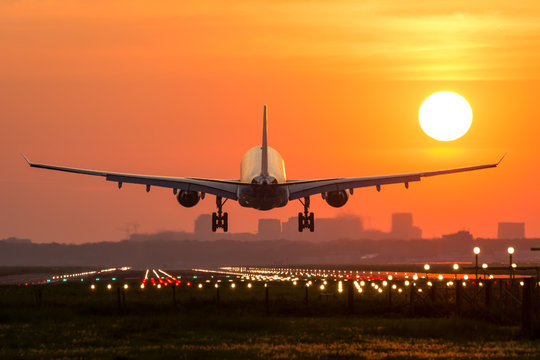]

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
pip install openpyxl

     |████████████████████████████████| 243 kB 4.3 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_Train=pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
df_Test=pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx')

In [4]:
df_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Data Preprocessing and Cleaning

In [5]:
df_Train.shape

(10683, 11)

In [6]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_Train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df_Train['Date_of_Journey'] = pd.to_datetime(df_Train['Date_of_Journey'])
df_Train['Dep_Time'] = pd.to_datetime(df_Train['Dep_Time'])
df_Train['Arrival_Time'] = pd.to_datetime(df_Train['Arrival_Time'])

In [9]:
df_Train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [10]:
df_Train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df_Train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
df_Train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10683, dtype: bool

In [13]:
df_Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_Train.dropna(inplace=True)

In [15]:
df_Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Check Categorical columns and Numerical Columns

In [16]:
cat_cols=[]
num_cols=[]
for i in df_Train.columns:
    if df_Train[i].dtype == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [17]:
df_Train[cat_cols]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info


In [18]:
df_Train[num_cols]

,Date_of_Journey,Dep_Time,Arrival_Time,Price
0,2019-03-24,2021-09-01 22:20:00,2021-03-22 01:10:00,3897
1,2019-01-05,2021-09-01 05:50:00,2021-09-01 13:15:00,7662
2,2019-09-06,2021-09-01 09:25:00,2021-06-10 04:25:00,13882
3,2019-12-05,2021-09-01 18:05:00,2021-09-01 23:30:00,6218
4,2019-01-03,2021-09-01 16:50:00,2021-09-01 21:35:00,13302
...,...,...,...,...
10678,2019-09-04,2021-09-01 19:55:00,2021-09-01 22:25:00,4107
10679,2019-04-27,2021-09-01 20:45:00,2021-09-01 23:20:00,4145
10680,2019-04-27,2021-09-01 08:20:00,2021-09-01 11:20:00,7229
10681,2019-01-03,2021-09-01 11:30:00,2021-09-01 14:10:00,12648


# Convert Date_of_Journey column into day, month, year

In [19]:
df_Train['Journey_day'] = df_Train['Date_of_Journey'].dt.day
df_Train['Journey_month'] = df_Train['Date_of_Journey'].dt.month
df_Train['Journey_year'] = df_Train['Date_of_Journey'].dt.year

In [20]:
# remove Date_of_Journey column from df_Train
df_Train.drop('Date_of_Journey', axis=1, inplace=True)

In [21]:
# Add Dep_Time_Hour and Dep_Time_Min and remove Dep_Time

df_Train['Dep_Time_Hour'] = df_Train['Dep_Time'].dt.hour
df_Train['Dep_Time_Min'] = df_Train['Dep_Time'].dt.minute
df_Train.drop('Dep_Time', inplace=True, axis=1)
df_Train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-09-01 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-09-01 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-09-01 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [22]:
# Add Arrival_Time_Hour and Arrival_Time_Min and remove Arrival_Time

df_Train['Arrival_Time_Hour'] = df_Train['Arrival_Time'].dt.hour
df_Train['Arrival_Time_Min'] = df_Train['Arrival_Time'].dt.minute
df_Train.drop('Arrival_Time', inplace=True, axis=1)
df_Train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


# pre-processing on duration column,Separate Duration hours and minute from duration

In [23]:
duration = list(df_Train['Duration'])


for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    
    else:
        if 'h' in duration[i]:   # Check if duration contains hour
            duration[i] = duration[i]+' 0m' # Add 0m
        else:
            duration[i] = '0h '+duration[i]
    


In [24]:
df_Train['Duration'] = duration

In [25]:
def duration_hour(x):
    return x.split(' ')[0][0:-1]

def duration_min(x):
    return x.split(' ')[1][0:-1]

In [26]:
df_Train['Duration_Hour'] = df_Train['Duration'].apply(duration_hour)
df_Train['Duration_Min'] = df_Train['Duration'].apply(duration_min)


In [27]:
df_Train['Duration_Hour'] = df_Train['Duration_Hour'].astype(int)
df_Train['Duration_Min'] = df_Train['Duration_Min'].astype(int)
df_Train.drop('Duration', inplace=True, axis=1)

# Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Airline Count plot'}, xlabel='Airline', ylabel='count'>

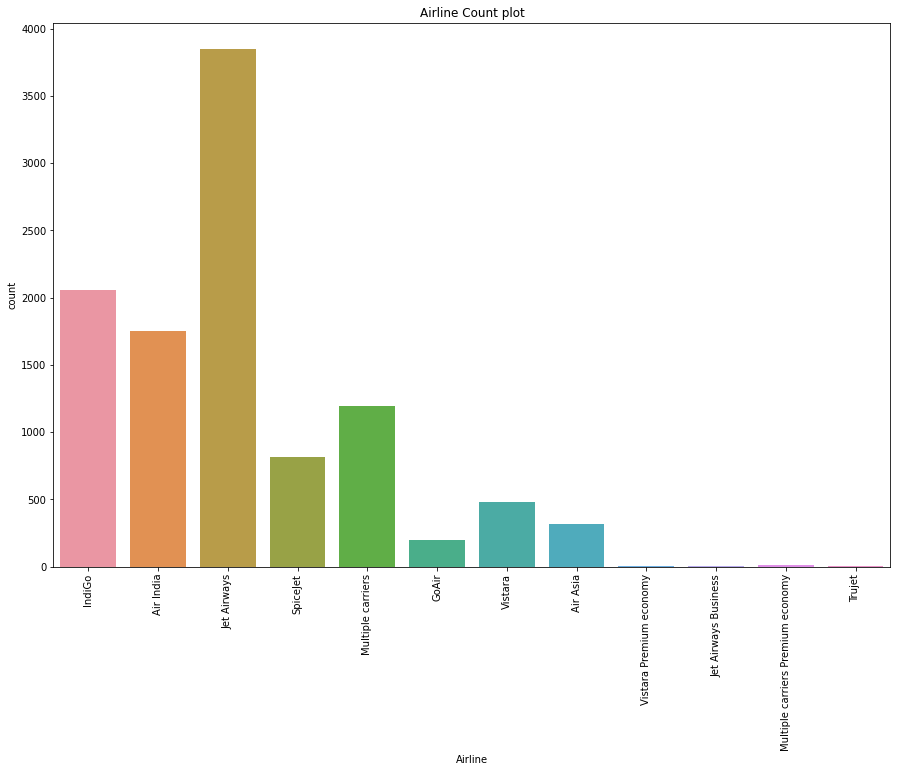

In [28]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Airline Count plot')
sns.countplot(df_Train['Airline'])

<AxesSubplot:title={'center':'Airline Vs Price'}, xlabel='Airline', ylabel='Price'>

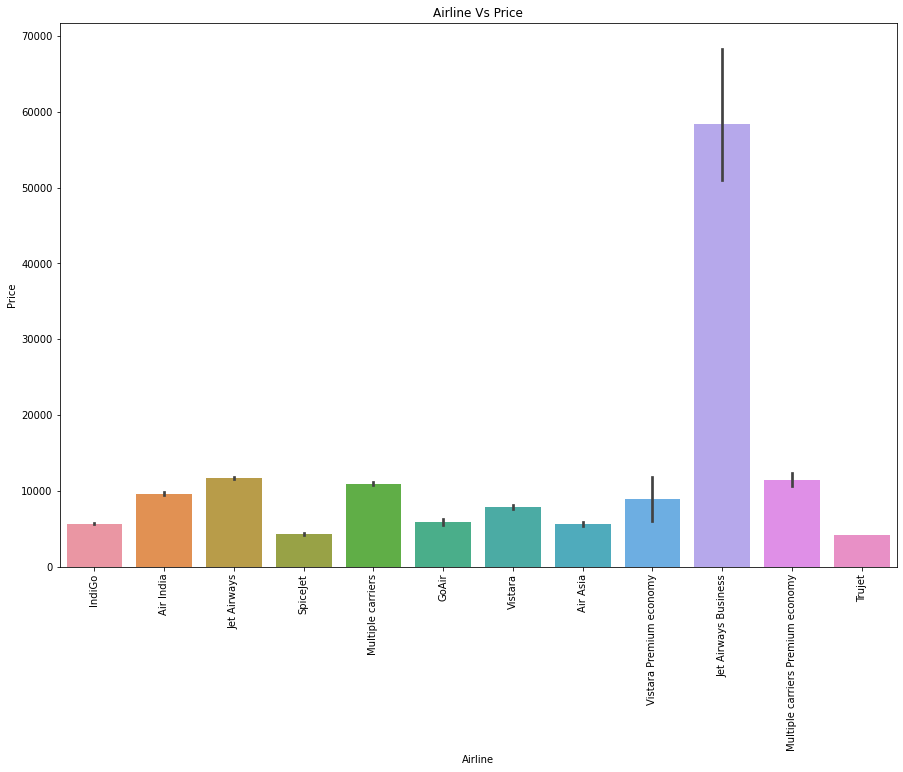

In [29]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Airline Vs Price')
sns.barplot(x=df_Train['Airline'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Airline Vs Price'}, xlabel='Airline', ylabel='Price'>

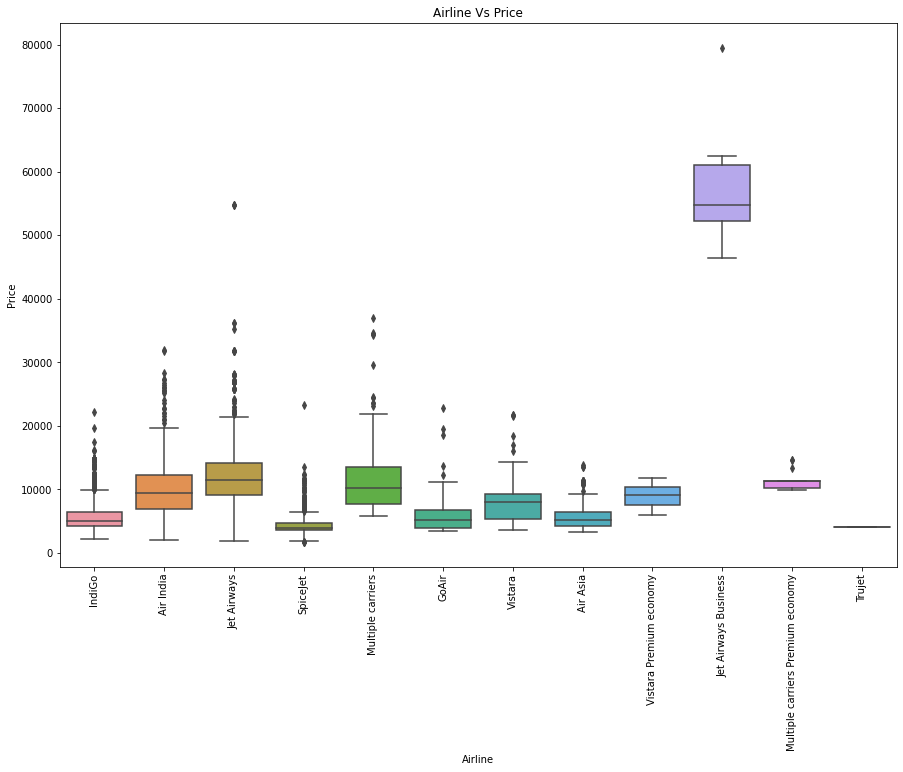

In [30]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Airline Vs Price')
sns.boxplot(x=df_Train['Airline'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Destination Vs Price'}, xlabel='Destination', ylabel='Price'>

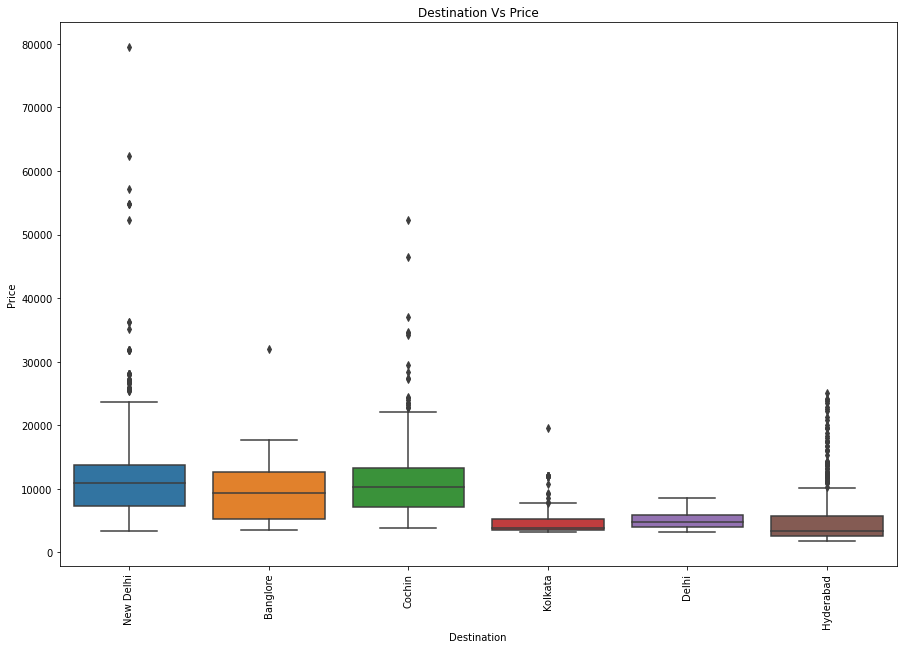

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Destination Vs Price')
sns.boxplot(x=df_Train['Destination'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Destination Vs Price'}, xlabel='Destination', ylabel='Price'>

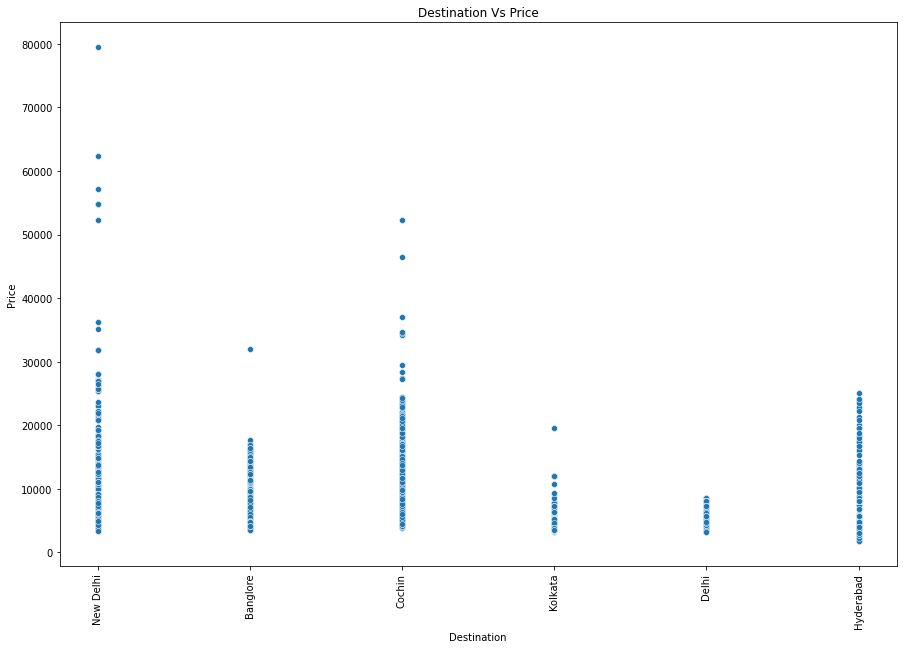

In [32]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Destination Vs Price')
sns.scatterplot(x=df_Train['Destination'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Source Vs Price'}, xlabel='Source', ylabel='Price'>

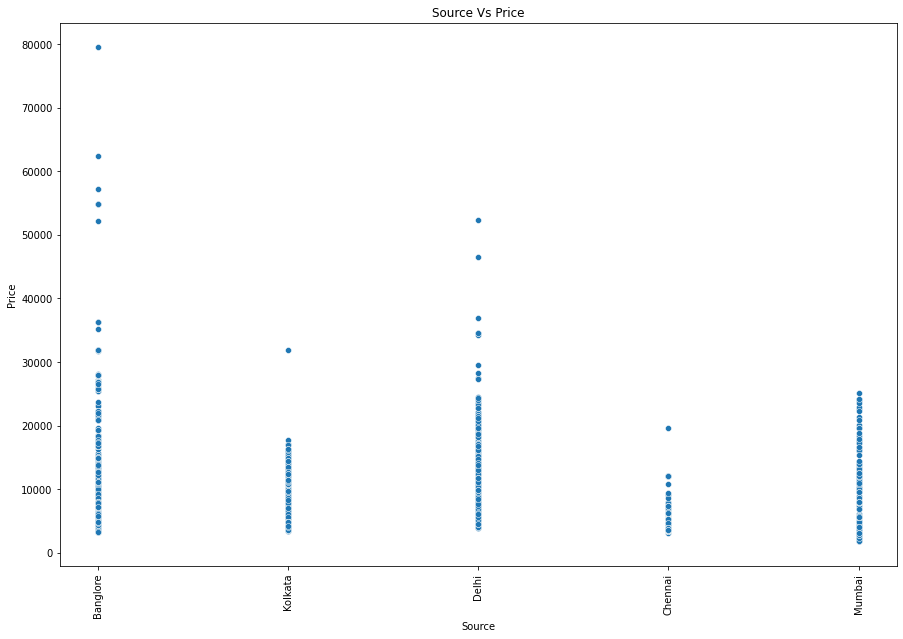

In [33]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Source Vs Price')
sns.scatterplot(x=df_Train['Source'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Total_Stops Vs Price'}, xlabel='Total_Stops', ylabel='Price'>

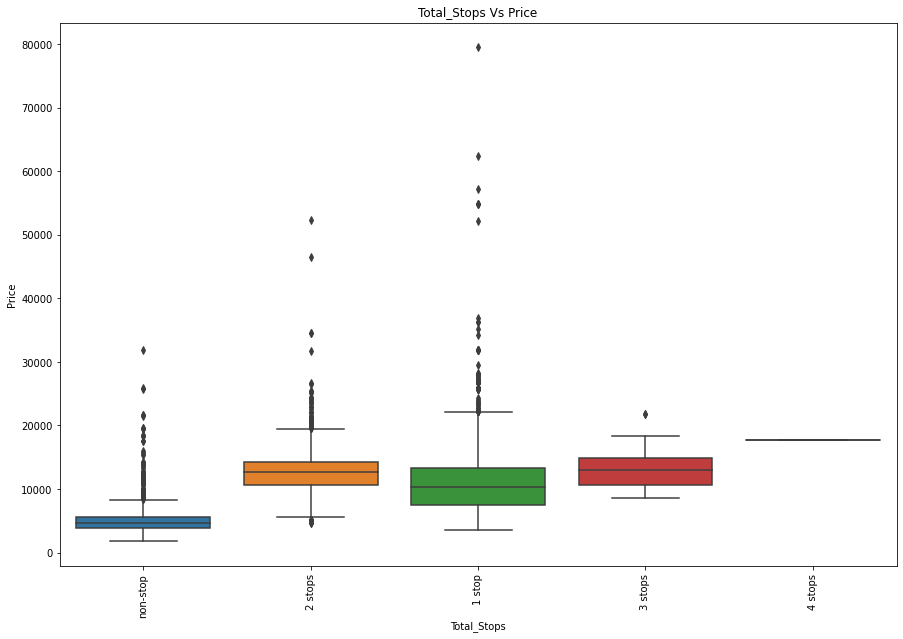

In [34]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Total_Stops Vs Price')
sns.boxplot(x=df_Train['Total_Stops'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Source Vs Price'}, xlabel='Source', ylabel='Price'>

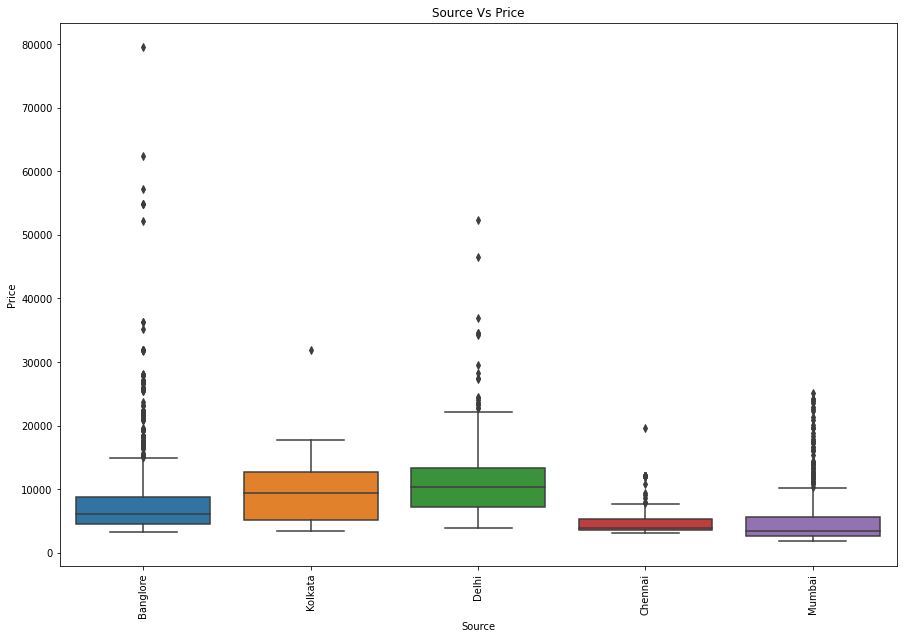

In [35]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Source Vs Price')
sns.boxplot(x=df_Train['Source'], y=df_Train['Price'], data=df_Train)

<AxesSubplot:title={'center':'Destination Vs Price'}, xlabel='Destination', ylabel='Price'>

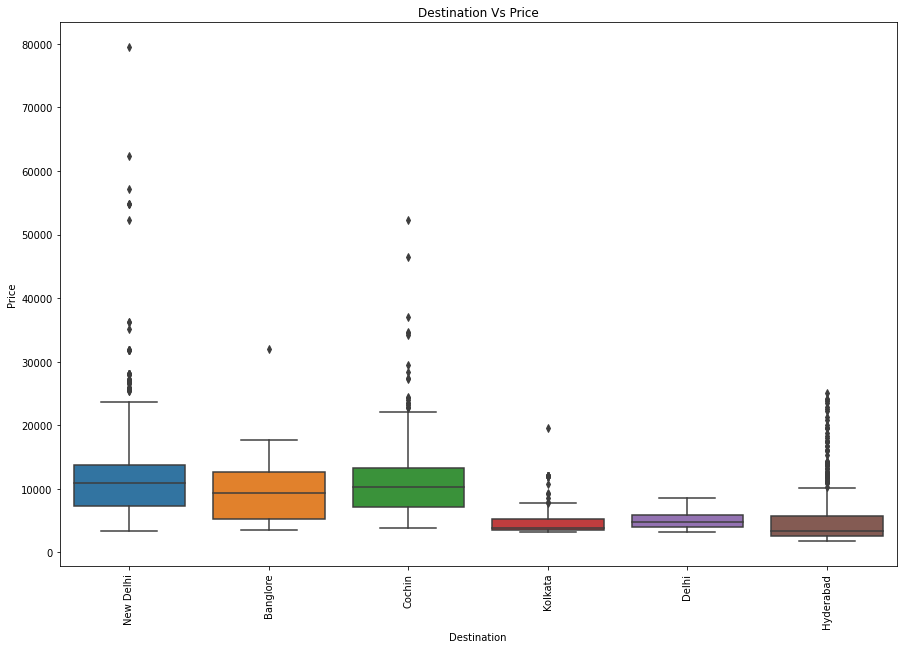

In [36]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Destination Vs Price')
sns.boxplot(x=df_Train['Destination'], y=df_Train['Price'], data=df_Train)

# Handle Categorical Data

Nominal data --> data are not in any order --> OneHotEncoder is used in this case


Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [37]:
cat_cols

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [38]:
df_Train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [39]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(df_Train['Airline'], drop_first=True)

In [40]:
df_Train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [41]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = pd.get_dummies(df_Train['Source'], drop_first=True)

In [42]:
df_Train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(df_Train['Destination'], drop_first=True)

In [44]:
df_Train['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → DED → DEL → HYD             1
BOM → JAI → DEL → HYD             1
BOM → NDC → HYD                   1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [45]:
df_Train['Route_1']=df_Train['Route'].str.split('→').str[0]
df_Train['Route_2']=df_Train['Route'].str.split('→').str[1]
df_Train['Route_3']=df_Train['Route'].str.split('→').str[2]
df_Train['Route_4']=df_Train['Route'].str.split('→').str[3]
df_Train['Route_5']=df_Train['Route'].str.split('→').str[4]

In [46]:
df_Train['Route_1'].fillna('None',inplace=True)
df_Train['Route_2'].fillna('None',inplace=True)
df_Train['Route_3'].fillna('None',inplace=True)
df_Train['Route_4'].fillna('None',inplace=True)
df_Train['Route_5'].fillna('None',inplace=True)

In [47]:
# as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    df_Train[i]=encoder.fit_transform(df_Train[i])

In [48]:
df_Train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
dict = {
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4,
}
df_Train['Total_Stops'] = df_Train['Total_Stops'].map(dict)

In [50]:
# removie this column there is no relevent infor in this col and also delete Route column

df_Train.drop(['Route','Additional_Info','Airline','Source','Destination'], inplace=True, axis=1)

In [51]:
df_Train = pd.concat([Airline,Source,Destination,df_Train], axis=1)

# Outlier Detection

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2160x1440 with 0 Axes>

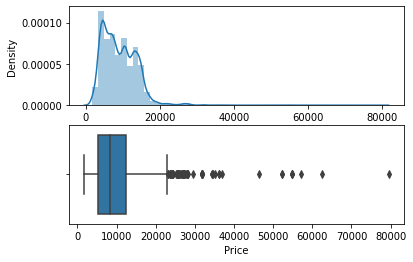

In [52]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    
plt.figure(figsize=(30,20))
plot(df_Train,'Price')

# Remove Outliers

In [53]:
df_Train['Price']=np.where(df_Train['Price']>=40000,df_Train['Price'].median(),df_Train['Price'])

# Now Seperate Independent and Dependent variables

In [54]:
X = df_Train.drop('Price',axis=1)
y = df_Train['Price']

# Feature Selection

In [55]:
# Feature Selection using Information Gain,

from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([0.77895168, 0.0879836 , 0.67205905, 0.91775574, 0.00538419,
       0.5934104 , 0.01232228, 0.32048223, 0.        , 0.21600316,
       0.        , 0.17110007, 1.55934434, 0.88443952, 0.29036906,
       1.53267682, 0.39798197, 0.30263605, 0.18100929, 0.37123786,
       2.14456647, 1.04594115, 0.8768258 , 1.46336429, 1.42247768,
       1.21226869, 1.83182733, 1.5266578 , 1.76703835, 1.09321542,
       2.06245521, 2.79597199, 2.27778114, 1.49035678, 0.74307816])

In [56]:
impo_col = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
impo_col

,0
Air India,0.760946
GoAir,0.100518
IndiGo,0.661227
Jet Airways,0.915973
Jet Airways Business,0.000000
Multiple carriers,0.575659
Multiple carriers Premium economy,0.000000
SpiceJet,0.337499
Trujet,0.009348
Vistara,0.219886


In [57]:
impo_col.columns=['Importance']
impo_col.sort_values(by='Importance',ascending=False)

,Importance
Route_2,2.794368
Route_3,2.329950
Total_Stops,2.166331
Route_1,2.015204
Arrival_Time_Hour,1.837698
Duration_Hour,1.778753
Arrival_Time_Min,1.544484
Delhi,1.528617
Cochin,1.508848
Journey_year,1.437421


# Split Data 

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Automate Model Prediction

In [59]:
from sklearn import metrics

def prediction(ml_model):
    model = ml_model.fit(X_train, y_train)
    print("Training Socre {}".format(model.score(X_train, y_train)))
    print('\n')
    y_prediction = model.predict(X_test)
    print("Predictions are \n {}".format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

# Import Different type of Regression Model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Linear Regression Predictions


Training Socre 0.617468452619985


Predictions are 
 [12087.68324394 10803.71505092  9392.08691281 ...  3842.22844171
 10227.03030501 12647.91568924]


r2 score: 0.6085563865816113
MAE: 1955.851998464261
MSE: 7738199.235267863
RMSE: 2781.761894064239


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


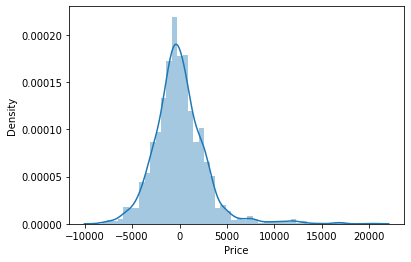

In [61]:
# Linear Regression Predictions
prediction(LinearRegression())

# KNeighborsRegressor Predictions


Training Socre 0.7806750825468731


Predictions are 
 [12141.6 10476.8  9956.4 ...  4097.  10015.   8621.4]


r2 score: 0.6384689583144736
MAE: 1768.7763219466542
MSE: 7146876.674946186
RMSE: 2673.3642989585587


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


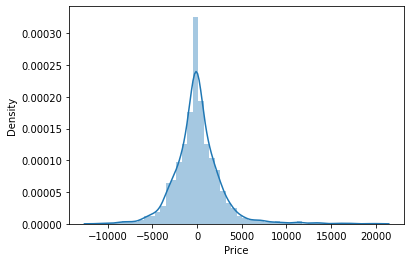

In [62]:
# KNeighborsRegressor Predictions
prediction(KNeighborsRegressor())

# RandomForestRegressor Predictions


Training Socre 0.9517201269255591


Predictions are 
 [12096.42666667  8703.485       8555.78       ...  4029.36066667
  9394.27       15141.53      ]


r2 score: 0.8364372312056015
MAE: 1112.5377372231576
MSE: 3233368.0995589616
RMSE: 1798.1568617779044


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


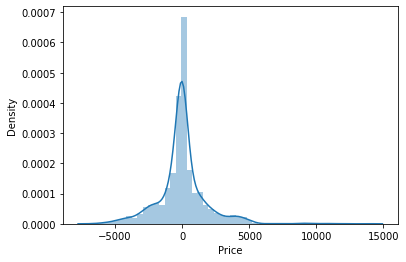

In [63]:
# RandomForestRegressor Predictions
prediction(RandomForestRegressor())

# DecisionTreeRegressor Predictions


Training Socre 0.96566403819285


Predictions are 
 [10262.  7408.  8610. ...  3841.  8925. 12583.]


r2 score: 0.732054497050401
MAE: 1322.2010216814847
MSE: 5296843.823587714
RMSE: 2301.4873068491415


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


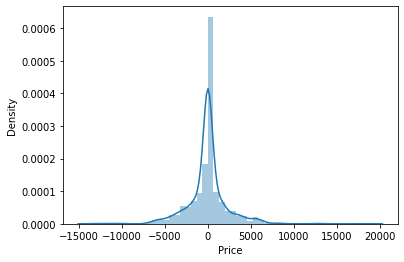

In [64]:
# DecisionTreeRegressor Predictions
prediction(DecisionTreeRegressor())

# Conclusion

RandomForestRegressor Predictions are better then other algoriths